# Projeto

**Detecção de Ataques utilizando Redes Neurais em Ambientes de Internet das Coisas**



- **Aluno**: Guilherme Rodriguez Vicentin
- **Email**: vicentingr@gmail.com

## Importação dos dados

In [19]:
import pandas as pd

df = pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_Best.csv', delimiter=';', encoding='ISO-8859-1', low_memory=False)

# Remover qualquer coluna que começa com Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Removendo o pkSeqID
df = df.drop(columns=['pkSeqID'])

df.head()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


Agora iremos pegar aleatoriamente 30% dos dados

In [20]:
df_sampled = df.sample(frac=0.3, random_state=1)

df_sampled.head()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
3615054,tcp,192.168.100.149,34662,192.168.100.3,3306,20481,0.000000,24,0.199696,6,0.199696,100,25.038057,30.045670,0.199696,1,Reconnaissance,Service_Scan
912034,udp,192.168.100.147,38821,192.168.100.7,80,32601,0.449179,100,1.380450,4,2.384421,100,0.000000,0.404534,2.605609,1,DoS,UDP
2576453,tcp,192.168.100.148,22525,192.168.100.3,80,138767,0.102594,80,0.000000,1,0.051297,100,0.000000,0.113870,0.256485,1,DDoS,TCP
158995,tcp,192.168.100.147,57998,192.168.100.7,80,157519,0.000000,100,0.000000,3,0.000000,100,0.000000,0.121890,0.000000,1,DoS,TCP
86970,tcp,192.168.100.150,12239,192.168.100.3,80,85494,0.030978,44,0.059693,1,0.090670,44,0.039643,0.118930,0.121648,1,DoS,TCP


## Análise inicial e pré-processamento

In [3]:
print("Listando tipo dos atributos:")
print(df.dtypes)


Listando tipo dos atributos:
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object


In [4]:
null_counts = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(null_counts)

Valores nulos em cada coluna:
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64


In [5]:
category_count = df['category'].value_counts()
print('Contagem por categorias:')
print(category_count)

Contagem por categorias:
category
DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: count, dtype: int64


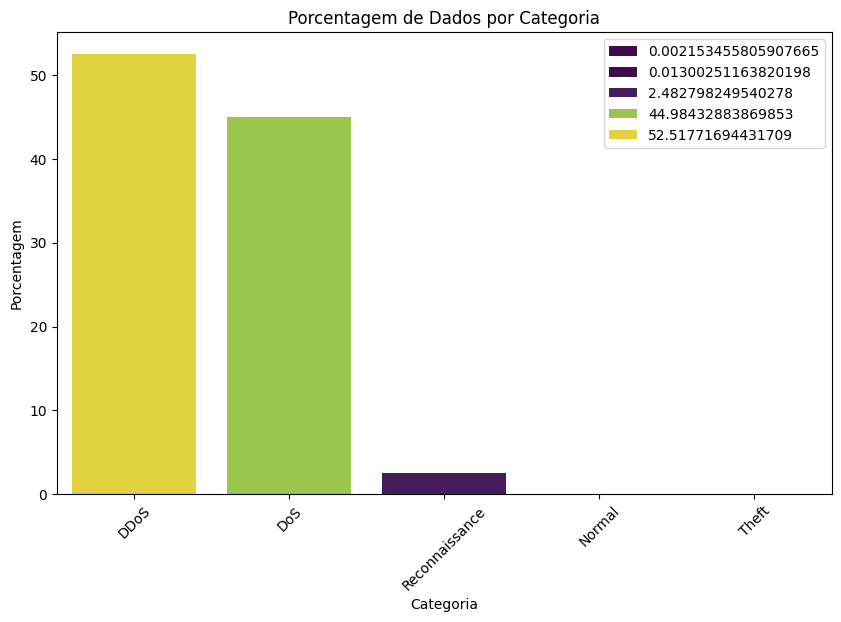

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_percentage = category_count / category_count.sum() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_percentage.index, y=cat_percentage.values, palette='viridis', hue=cat_percentage.values)
plt.title('Porcentagem de Dados por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.show()

### Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

obj_columns = ['proto', 'saddr', 'sport', 'daddr', 'dport', 'category', 'subcategory']

label_encoder = LabelEncoder()

for col in obj_columns:
    df_sampled[col] = label_encoder.fit_transform(df_sampled[col])

In [71]:
df_sampled.head()

,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
3615054,3,3,27410,12,2352,20481,0.000000,24,0.199696,6,0.199696,100,25.038057,30.045670,0.199696,1,3,4
912034,4,1,32031,16,4241,32601,0.449179,100,1.380450,4,2.384421,100,0.000000,0.404534,2.605609,1,1,6
2576453,3,2,13925,12,4241,138767,0.102594,80,0.000000,1,0.051297,100,0.000000,0.113870,0.256485,1,0,5
158995,3,1,53337,16,4241,157519,0.000000,100,0.000000,3,0.000000,100,0.000000,0.121890,0.000000,1,1,5
86970,3,4,2496,12,4241,85494,0.030978,44,0.059693,1,0.090670,44,0.039643,0.118930,0.121648,1,1,5


### Balanceamento

Queremos garantir que cada classe em um conjunto de dados tenha aproximadamente o mesmo número de exemplos

In [22]:
from imblearn.over_sampling import SMOTE

# Separar características e rótulos
X = df_sampled.drop(columns=['category'])
y = df_sampled['category']

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar o balanceamento das classes
print("Distribuição das classes antes do SMOTE:\n", y.value_counts())
print("Distribuição das classes após o SMOTE:\n", pd.Series(y_resampled).value_counts())

Distribuição das classes antes do SMOTE:
 category
0    578406
1    495049
3     26932
2       153
4        17
Name: count, dtype: int64
Distribuição das classes após o SMOTE:
 category
3    578406
1    578406
0    578406
2    578406
4    578406
Name: count, dtype: int64


### Definição da classe alvo

In [23]:
y = df_sampled['attack']
X = df_sampled.drop('attack', axis=1)

In [27]:
X.head()


,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,subcategory
3615054,3,3,27410,12,2352,20481,0.000000,24,0.199696,6,0.199696,100,25.038057,30.045670,0.199696,3,4
912034,4,1,32031,16,4241,32601,0.449179,100,1.380450,4,2.384421,100,0.000000,0.404534,2.605609,1,6
2576453,3,2,13925,12,4241,138767,0.102594,80,0.000000,1,0.051297,100,0.000000,0.113870,0.256485,0,5
158995,3,1,53337,16,4241,157519,0.000000,100,0.000000,3,0.000000,100,0.000000,0.121890,0.000000,1,5
86970,3,4,2496,12,4241,85494,0.030978,44,0.059693,1,0.090670,44,0.039643,0.118930,0.121648,1,5


### Separando dados de treino e teste

In [53]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 880445 amostras
Tamanho do conjunto de teste: 220112 amostras


### Normalização

In [54]:
from sklearn.preprocessing import StandardScaler

# Aplicar StandardScaler para normalizar as colunas numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classificação com Multi-Layer Perceptron (MLP)

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 2), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Fazer previsões
y_pred = mlp.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[    40      0]
 [     2 220070]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      1.00      1.00    220072

    accuracy                           1.00    220112
   macro avg       0.98      1.00      0.99    220112
weighted avg       1.00      1.00      1.00    220112



### Avaliando diferentes arquiteturas

In [32]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para a busca em grade
param_grid = {
    'hidden_layer_sizes': [
        (10, 5, 2), 
        (50, 25, 10), 
        (100, 50, 20)
    ]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Treinar o modelo
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor estimador
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = best_estimator.predict(X_test)

# Avaliar o modelo
print("Melhores Parâmetros:", best_params)
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Melhores Parâmetros: {'hidden_layer_sizes': (10, 5, 2)}

Matriz de Confusão:
[[    40      0]
 [     2 220070]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      1.00      1.00    220072

    accuracy                           1.00    220112
   macro avg       0.98      1.00      0.99    220112
weighted avg       1.00      1.00      1.00    220112



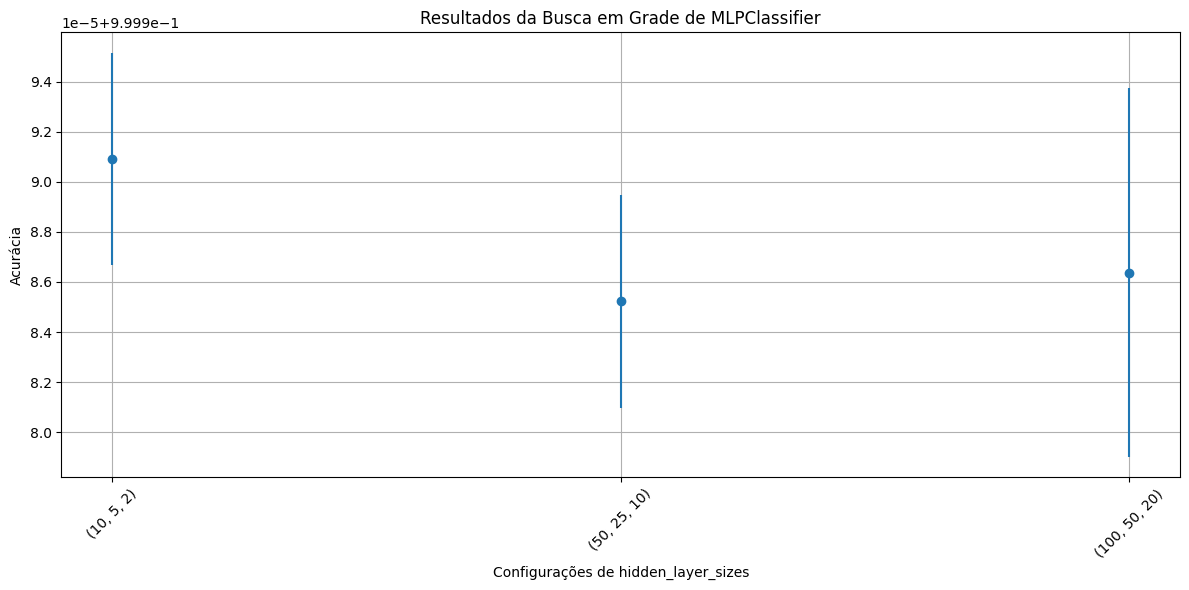

[CV] END ......................hidden_layer_sizes=(10, 5, 2); total time=  13.1s
[CV] END ......................hidden_layer_sizes=(10, 5, 2); total time=  18.4s
[CV] END ....................hidden_layer_sizes=(50, 25, 10); total time=  18.7s
[CV] END ....................hidden_layer_sizes=(50, 25, 10); total time=  19.0s
[CV] END ......................hidden_layer_sizes=(10, 5, 2); total time=  24.0s
[CV] END ....................hidden_layer_sizes=(50, 25, 10); total time=  26.3s
[CV] END ...................hidden_layer_sizes=(100, 50, 20); total time=  32.5s
[CV] END ...................hidden_layer_sizes=(100, 50, 20); total time=  35.8s
[CV] END ...................hidden_layer_sizes=(100, 50, 20); total time=  36.7s


In [35]:
import matplotlib.pyplot as plt

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 6))
means = results['mean_test_score']
stds = results['std_test_score']
params = results['param_hidden_layer_sizes']

plt.errorbar(range(len(params)), means, yerr=stds, fmt='o')
plt.xticks(range(len(params)), params, rotation=45)
plt.xlabel('Configurações de hidden_layer_sizes')
plt.ylabel('Acurácia')
plt.title('Resultados da Busca em Grade de MLPClassifier')
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualização da matrix de confusão


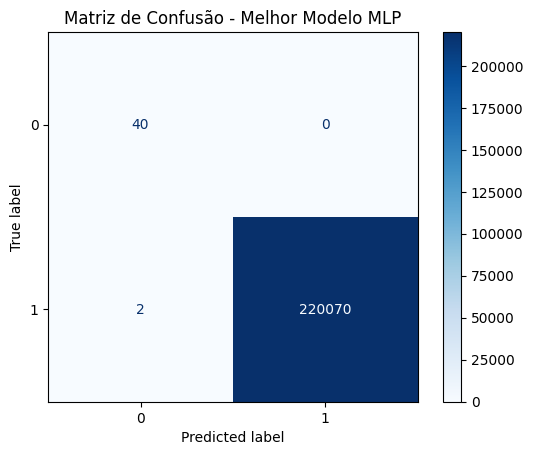

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Melhor Modelo MLP')
plt.show()

## Classificação com Deep Neural Network (DNN)

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)



Epoch 1/30


/home/gvicentin/labs/jupyter/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 448us/step - accuracy: 0.9987 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 3.3707e-05
Epoch 2/30
22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 440us/step - accuracy: 1.0000 - loss: 2.4896e-04 - val_accuracy: 1.0000 - val_loss: 8.0512e-06
Epoch 3/30
22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 440us/step - accuracy: 1.0000 - loss: 2.3100e-04 - val_accuracy: 1.0000 - val_loss: 7.5849e-05
Epoch 4/30
22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 442us/step - accuracy: 1.0000 - loss: 4.7068e-05 - val_accuracy: 1.0000 - val_loss: 4.3913e-05
Epoch 5/30
22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 441us/step - accuracy: 1.0000 - loss: 2.1907e-04 - val_accuracy: 1.0000 - val_loss: 1.5859e-04
Epoch 6/30
22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 439us/step - accuracy: 1.0000 - loss: 1.4982e-04 - val_accuracy: 1.0000 - val_loss: 8.1218e-05
Epoch 7/30
22012/22012 ━━━━━━━━━━━━━━━━━━━━ 10s 445us/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 9.8335e-05
Epoch 8/30
22012/2

### Teste de acurácia

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

6879/6879 ━━━━━━━━━━━━━━━━━━━━ 2s 302us/step - accuracy: 1.0000 - loss: 1.8463e-04
Test Accuracy: 0.9999772906303406
6879/6879 ━━━━━━━━━━━━━━━━━━━━ 2s 332us/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       1.00      1.00      1.00    220072

    accuracy                           1.00    220112
   macro avg       0.97      0.96      0.97    220112
weighted avg       1.00      1.00      1.00    220112



### Gráfico de evolução do treinamento

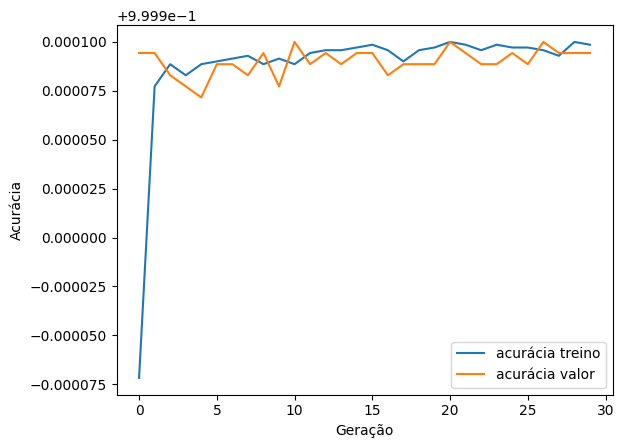

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acurácia treino')
plt.plot(history.history['val_accuracy'], label='acurácia valor')
plt.xlabel('Geração')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

## Comparação dos resultados

Ambos modelos utilizados no trabalho final da disciplina de Deep Learning apresentaram desempenho excelente na classificação dos dados, com resultados semelhandtes. 

### Acurácia

Ambos os modelos alcançaram uma acurácia de 1.00, o que significa que foram capazes de prever corretamente todas as amostras nos dados de teste.

### Precisão e Recall

Ambos os modelos (DNN e MLP) obtiveram resultados muito próximos em precision (0.95) e recall (1.00) para a classe 0. Isso indica que ambos os modelos são capazes de identificar corretamente a classe 0 na maioria das vezes quando ela está presente.
Para a classe 1, ambos os modelos apresentaram resultados excelentes com precision e recall de 1.00

### F1-Score

O F1-score é a média harmônica de precision e recall, e ambos os modelos apresentaram valores muito altos (próximos de 1.00) para ambas as classes, o que indica um bom equilíbrio entre precision e recall.

### Macro avg e Weighted avg

As médias macro e ponderada das métricas (precision, recall, F1-score) para ambas as classes são consistentemente altas para ambos os modelos, sugerindo que eles têm um desempenho robusto e consistente em todas as métricas avaliadas.